In [1]:
import umap
import pandas as pd
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

#293 patients
mrna = pd.read_csv("data/clean_datasets/mrna_clean.csv")
meth = pd.read_csv("data/clean_datasets/meth_clean.csv")
mirna = pd.read_csv("data/clean_datasets/mirna_clean.csv")
#576 patients
cancer_genes = pd.read_csv("data/cancer_genes.csv", header = None)
cancer_mir = pd.read_csv('data/mirs.txt', sep="\t")

In [2]:
mrna = mrna.set_index('Gene')

In [3]:
del meth["Unnamed: 0"]
meth = meth.set_index('Gene')

In [2]:
mirna = mirna.set_index('miRNA')

In [3]:
class dimr:
    def __init__(self, data, genes):
        self.data = data
        self.genes = genes
    
    def algo_umap(self, n_neigh, min_dis):
        #data = self.data.drop(['Gene'], axis=1).T
        #for i in range(100):
        #data = self.data.T

        try:
            color_idx = pd.read_csv("color_idx_mirna.csv")
        except:
            color_idx = obj_train.process()
        
        umap_result = umap.UMAP(n_neighbors = n_neigh, min_dist = min_dis, metric = 'cosine', random_state=22).fit_transform(self.data)
        print("UMAP result shape", umap_result.shape)

        final_df = pd.DataFrame(umap_result, index=range(umap_result.shape[0]), columns=range(umap_result.shape[1]))
        final_df.to_csv("umap_seed22/mirna/umap_" + str(n_neigh) + '___'+ str(min_dis) + ".csv", index = None)
    
    def algo_tsne(self, perplex, met, iter):
        #data = self.data.drop(['Gene'], axis=1).T
        #fo   rang
        data = self.data

        try:
            color_idx = pd.read_csv("color_idx_mrna.csv")
        except:
            color_idx = obj_train.process()
    
        tsne = TSNE(n_components = 2, verbose = 1, perplexity = perplex, metric = met, n_iter=iter, random_state= 22)
        tsne_result = tsne.fit_transform(data)

        final_df = pd.DataFrame(tsne_result, index=range(tsne_result.shape[0]), columns=range(tsne_result.shape[1]))
        #final_df = pd.concat([final_df, color_idx], axis=1)
        #final_df.columns = ['a', 'b', 'c']
        final_df.to_csv("tsne_seed22/mirna/tsne_" + str(perplex) + '___'+ met + ".csv", index = None)
        #final_df.to_csv("t22/meth/deepinsight/tsne_9_cosine/data_finaldf/tsne_6_cosine_" + str(i)+ ".csv", index = None)
        #plt.clf()
        #plot = sns.scatterplot('a', 'b', data = final_df, legend = "full",alpha=0.1).set_title('tsne-plot-dist_' + str(perplex) + '___' + met + '_')
        #plot.figure.savefig('plots_515/tsne/tsne_'+ str(perplex) + '___'+ met + '.svg', format = 'svg', dpi = 1200)

        #plt.clf()
        #df = final_df.loc[final_df['c']>=2] 
        #df.to_csv("plots_515/tsne_6_cosine/data_df/tsne_6_cosine_" + str(i) + ".csv", index = None)
        #df.to_csv("plots_515/tsne_6_cosine/data_df/tsne_6_cosine_" + str(perplex) + '___'+ met + ".csv", index = None)
        #plot = sns.scatterplot('a', 'b', data=df, hue = 'c', palette=['green','orange','brown','dodgerblue','red', 'magenta', 'cyan', 'black', 'blue', 'yellow']).set_title('test_' + str(perplex) + '___' + met + '_')
        #plot.figure.savefig('plots_515/tsne_6_cosine/tsne_'+ str(perplex) + '___'+ met + '.png', format = 'png', dpi = 1200)

    def process(self):
        #patients = self.data.iloc[:][:]
        patients = self.data.T
        #patients = patients.drop(['Unnamed: 0'], axis=1)
        #print(self.d.head())
        
        #genes = self.genes.iloc[:][0]
        genes = self.genes.iloc[:]['miRNA']    #for mirna
        latent_loc = []
        not_found = []
        for i in genes:
            try:
                location = patients.columns.get_loc(i)      #get gene location
                latent_loc.append(location)
            except:
                print(i, "Not Located") 
                not_found.append(i)             
                latent_loc.append(int(0))
                continue

        gene_loc = pd.DataFrame(latent_loc)
        print(gene_loc)

        #a = self.genes.iloc[:][2]
        a = self.genes.iloc[:]['Rank']    #for mirna
        print(a)
        a = a.to_numpy()
        print(len(a))

        gene_loc[1] = pd.Series(a, index=gene_loc.index)
        #gene_loc.drop([gene_loc.index[40],gene_loc.index[43]], inplace = True)
        gene_loc.reset_index(inplace = True)
        gene_loc = gene_loc.drop(columns=['index'])

        color_idx = pd.DataFrame(index=range(0, len(self.data)),columns=range(1))
        print(len(gene_loc))
        for j in range(0, len(gene_loc)):
            print("step", j, "of", str(len(gene_loc)))
            #for i in range(0, 20172):
            for i in range(0, len(self.data)):
                if i == gene_loc.iloc[j][0]:
                    color_idx.iloc[i] = gene_loc.iloc[j][1]
                    break
                else:
                    continue
        color_idx = color_idx.fillna(1)
        color_idx.to_csv("color_idx_mirna.csv", index = None)
        return color_idx

    def run_umap(self):
        for i in [2, 5, 10, 15, 20, 30, 40, 50]:
            for j in [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
                obj_train.algo_umap(i, j)

    def run_tsne(self):
        for i in range(100):
            #for j in ['cosine', 'euclidean']:
            obj_train.algo_tsne(i, 'cosine', 1000)         

In [4]:
#obj_train = dimr(meth, cancer_genes)
#obj_train.run_tsne()
obj_train = dimr(mirna, cancer_mir)

In [5]:
obj_train.run_umap()    

hsa-miR-3187-3p Not Located
hsa-miR-3926 Not Located
hsa-miR-1910-5p Not Located
hsa-miR-3126-3p Not Located
hsa-miR-3653 Not Located
hsa-miR-299-3p Not Located
hsa-miR-1305 Not Located
hsa-miR-490-3p Not Located
hsa-miR-466 Not Located
hsa-miR-1915-3p Not Located
hsa-miR-3138 Not Located
hsa-miR-3189-3p Not Located
hsa-miR-1915-5p Not Located
hsa-miR-3145-3p Not Located
hsa-miR-3154 Not Located
hsa-miR-3125 Not Located
hsa-miR-1197 Not Located
hsa-miR-1243 Not Located
hsa-miR-545-3p Not Located
hsa-miR-665 Not Located
hsa-miR-873-5p Not Located
hsa-miR-3920 Not Located
hsa-miR-548f-3p Not Located
hsa-miR-3943 Not Located
hsa-miR-3678-5p Not Located
hsa-miR-1293 Not Located
hsa-miR-4286 Not Located
hsa-miR-25-5p Not Located
hsa-miR-668-3p Not Located
       0
0    419
1     67
2     81
3    208
4     48
..   ...
104  445
105    0
106   15
107  366
108   38

[109 rows x 1 columns]
0      1
1      0
2      0
3      0
4      1
      ..
104    0
105    1
106    0
107    1
108    0
Name: Ra

In [6]:
import os
import natsort
#listdir = os.listdir('tsne_seed22/mrna/final_df_cosine')
listdir = os.listdir('umap_seed22/mirna/final_df_cosine')
color_idx_meth = pd.read_csv("color_idx_meth.csv")
color_idx_mrna = pd.read_csv("color_idx_mrna.csv")
color_idx_mirna = pd.read_csv("color_idx_mirna.csv")
listdir = natsort.natsorted(listdir)

In [ ]:
color_idx_mrna

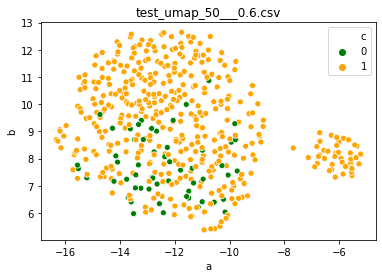

In [11]:
for doc in listdir:
    final_df = pd.read_csv('umap_seed22/mirna/final_df_cosine/' + doc)
    #final_df = final_df.drop('c', axis =1)
    #print(final_df.head(5))
    #print(color_idx_mirna.head(5))
    #final_df = pd.concat([final_df, color_idx_meth], axis=1)
    final_df = pd.concat([final_df, color_idx_mirna], axis=1)
    final_df.columns = ['a', 'b', 'c']
    final_df.to_csv('umap_seed22/mirna/df_cosine' + doc)

    #df = final_df.loc[final_df['c']>=2] 
    #print(final_df.head(10))
    #df.to_csv('umap_seed22/mirna/df_cosine/' + doc)

    plt.clf()
    plot = sns.scatterplot('a', 'b', data = final_df, legend = "full",alpha=0.1).set_title('tsne-plot-dist' + doc)
    #plot.figure.savefig('plots_515/tsne_6_cosine_100iter/pics/' + doc + '.png', format = 'png', dpi = 1200)
    #plot = sns.scatterplot('a', 'b', data   = df, hue = 'c', palette=['green','orange','brown','dodgerblue','red', 'magenta', 'cyan', 'black']).set_title('test_' + doc)
    plot = sns.scatterplot('a', 'b', data  = final_df, hue = 'c', palette=['green','orange']).set_title('test_' + doc)
    #['green','orange','brown','dodgerblue','red', 'magenta', 'cyan', 'black']
    plot.figure.savefig('umap_seed22/mirna/plots/' + doc + '.png', format = 'png', dpi = 1200)

In [12]:
df['c']

0         9
796      11
1044      4
1109      9
1153      7
         ..
17543     9
18186    12
19243    11
19255    11
19278    11
Name: c, Length: 81, dtype: int64

In [ ]:
listdir = os.listdir('plots_515/umap/data_finaldf')
listdir = natsort.natsorted(listdir)
for doc in listdir:
    final_df = pd.read_csv('plots_515/umap/data_finaldf/' + doc)
    final_df = final_df.drop('c', axis =1)
    final_df = pd.concat([final_df, color_idx], axis=1)
    final_df.columns = ['a', 'b', 'c']
    final_df.to_csv('plots_515/umap/data_finaldf_2/' + doc)

    df = final_df.loc[final_df['c']>=2] 
    df.to_csv('plots_515/umap/data_df/' + doc)

    plt.clf()
    plot = sns.scatterplot('a', 'b', data = final_df, legend = "full",alpha=0.1).set_title('umap-plot-dist' + doc)
    #plot.figure.savefig('plots_515/tsne_6_cosine_100iter/pics/' + doc + '.png', format = 'png', dpi = 1200)
    plot = sns.scatterplot('a', 'b', data=df, hue = 'c', palette=['green','orange','brown','dodgerblue','red', 'magenta', 'cyan', 'black', 'blue', 'yellow']).set_title('test_' + doc)
    plot.figure.savefig('plots_515/umap/pics/'+ doc+ '.png', format = 'png', dpi = 1200)